## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" 
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on='Mouse ID')
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# # Checking the number of mice.
# mice_data = merge_df["Mouse ID"].value_counts()
# mice_data_df = pd.DataFrame(mice_data)
# mice_data_df.head()
len(merge_df["Mouse ID"].unique())
num_mice = len(merge_df["Mouse ID"].unique())
print(f"Number of Mice: {num_mice}")

Number of Mice: 249


In [3]:
# mice_df = len(mice_data)
# mice_df
# print(f"Number of Mice: {mice_df}")

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice
#####  .DUPLICATED()     IT'S RIGHT



array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = merge_df.loc[merge_df["Mouse ID"]=="g989"]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# print all rows where mouse ID column is NOT in duplicate_mice
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())
num_mice_clean_data = len(clean_df["Mouse ID"].unique())
print(f"Number of Mice from a Cleaned DataFrame: {num_mice_clean_data}")

Number of Mice from a Cleaned DataFrame: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
average = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
middle = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stan_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
semi = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

stat_table = pd.DataFrame({
    "Tumor Volume Mean": average,
    "Tumor Volume Median": middle,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": stan_dev,
    "Tumor Volume Semi": semi
})

stat_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Semi
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#df.agg(['sum', 'min'])

stat_table_new = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stat_table_new

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

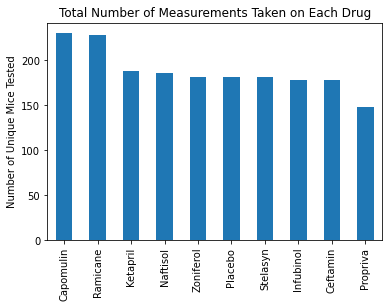

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_num = clean_df["Drug Regimen"].value_counts()
total_num.plot(kind="bar")
plt.title("Total Number of Measurements Taken on Each Drug")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

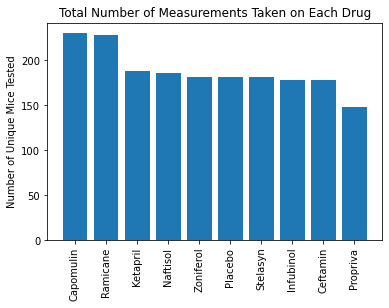

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(total_num.index.values, total_num.values)
plt.title("Total Number of Measurements Taken on Each Drug")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")
plt.show()

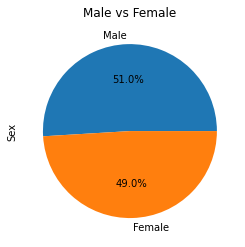

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_range = clean_df["Sex"].value_counts()
#gender_range

#total_num = clean_df["Drug Regimen"].value_counts()
gender_range.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male vs Female")
plt.ylabel("Sex")
plt.show()

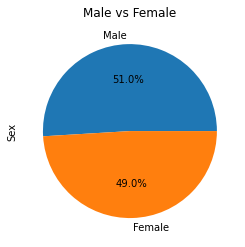

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_range.values, labels=gender_range.index.values, autopct="%1.1f%%")
plt.title("Male vs Female")
#plt.xticks(rotation=90)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_df = clean_df.sort_values(by='Timepoint', ascending=False)
timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
163,o302,0,45.000000,0,Placebo,Female,2,29
162,t718,0,45.000000,0,Placebo,Female,10,30
161,w167,0,45.000000,0,Placebo,Female,6,28
160,x773,0,45.000000,0,Placebo,Female,21,30


In [15]:
timepoint_df = clean_df.drop_duplicates(subset=["Mouse ID"])
timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [16]:
# max_tumor_df = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
# max_tumor_df = max_tumor.reset_index()
# max_tumor_df
timepoint_df = clean_df.groupby ("Mouse ID").max()["Timepoint"]
timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [17]:
new_merged_data = clean_df.merge(timepoint_df,on=['Mouse ID','Timepoint'],how="left")
new_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# treatment list
four_drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# placeholder for total volume    
#tumor_volume_list = []

# tumor_volume_list = []
# for drug in four_drugs_list:
#          tumor_volume = clean_df.groupby ("Mouse ID").max()["Tumor Volume (mm3)"]
# tumor_volume    
tumor_volume_list = []
for drug in four_drugs_list:
    #tumor_volume = clean_df.groupby ("Mouse ID").max()["Tumor Volume (mm3)"].loc[Drug Regimen[four_drugs_list]]]
    
                                        ####   2 METHODS TO FIGURE THIS OUT
    
    #tumor_volume = clean_df.groupby ("Mouse ID").max()["Tumor Volume (mm3)"]clean_df.loc["Drug Regimen"[drug]]
    tumor_volume = clean_df.groupby ("Mouse ID").max()    ##### OR USE CONDITIONALS   +
    #print(drug) 
    

In [19]:
tumor_volume_df = pd.DataFrame(four_drugs_list)
tumor_volume_df
tumor_volume.head()
#type(tumor_volume)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29


In [20]:
final_tumor_volume = new_merged_data.loc[new_merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
final_tumor_volume_df = pd.DataFrame(tumor_volume_df)
final_tumor_volume_df.head()

,0
0,Capomulin
1,Ramicane
2,Infubinol
3,Ceftamin


In [21]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# four_drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# fig1, ax1 = plt.subplots()
# ax1.set_title("Final Tumor Volume")
# ax1.set_xlabel("Treatments")
# ax1.set_ylabel("Tumor Volume")
# ax1.boxplot(timepoint_df)
# plt.show()


In [30]:
quartiles = final_tumor_volume.quantile([.25,.5,.75])
# print(quartiles)
# quartiles_df = pd.DataFrame(quartiles)
# quartiles_df
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]

In [31]:
quartiles

0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# lower_quartile = quartiles[0.25]
# upperq = quartiles[0.75]

In [24]:
# #quartiles[0]
# new_merged_data[final_tumor_volume[1]].sort
# print(new_merged_data[final_tumor_volume[1]])

In [25]:
four_drugs_list.append(final_tumor_volume)

In [26]:
four_drugs_list_df = pd.DataFrame(tumor_volume)
four_drugs_list_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [27]:
quartiles = final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

four_drugs_list.append(final_tumor_volume)

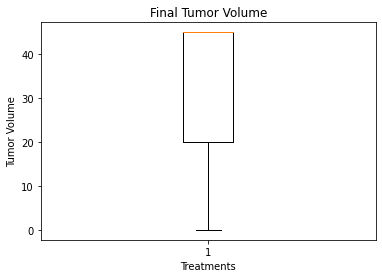

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_xlabel("Treatments")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(timepoint_df)
plt.show()


## Line and Scatter Plots

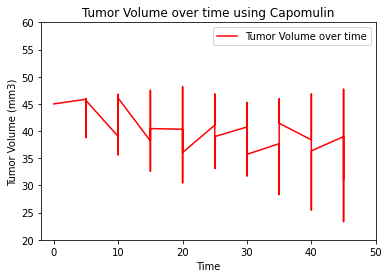

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
plt.title("Tumor Volume over time using Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20,60)
plt.xlim(-2,50)
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"] ,color="red", label="Tumor Volume over time" )
plt.legend()
plt.show()

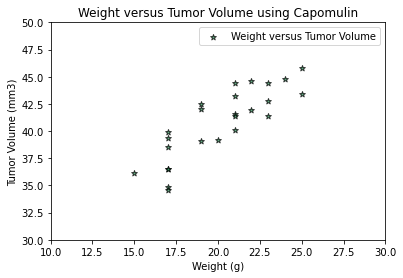

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume = capomulin_mouse.groupby("Mouse ID").mean()
average_tumor_volume

x_axis = average_tumor_volume["Weight (g)"]
y_axis = average_tumor_volume["Tumor Volume (mm3)"]

plt.title("Weight versus Tumor Volume using Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,50)
plt.xlim(10,30)

plt.scatter(x_axis, y_axis, marker="*", facecolors="seagreen", edgecolors="black",  alpha=0.75, label="Weight versus Tumor Volume")
plt.legend()
plt.plot()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
